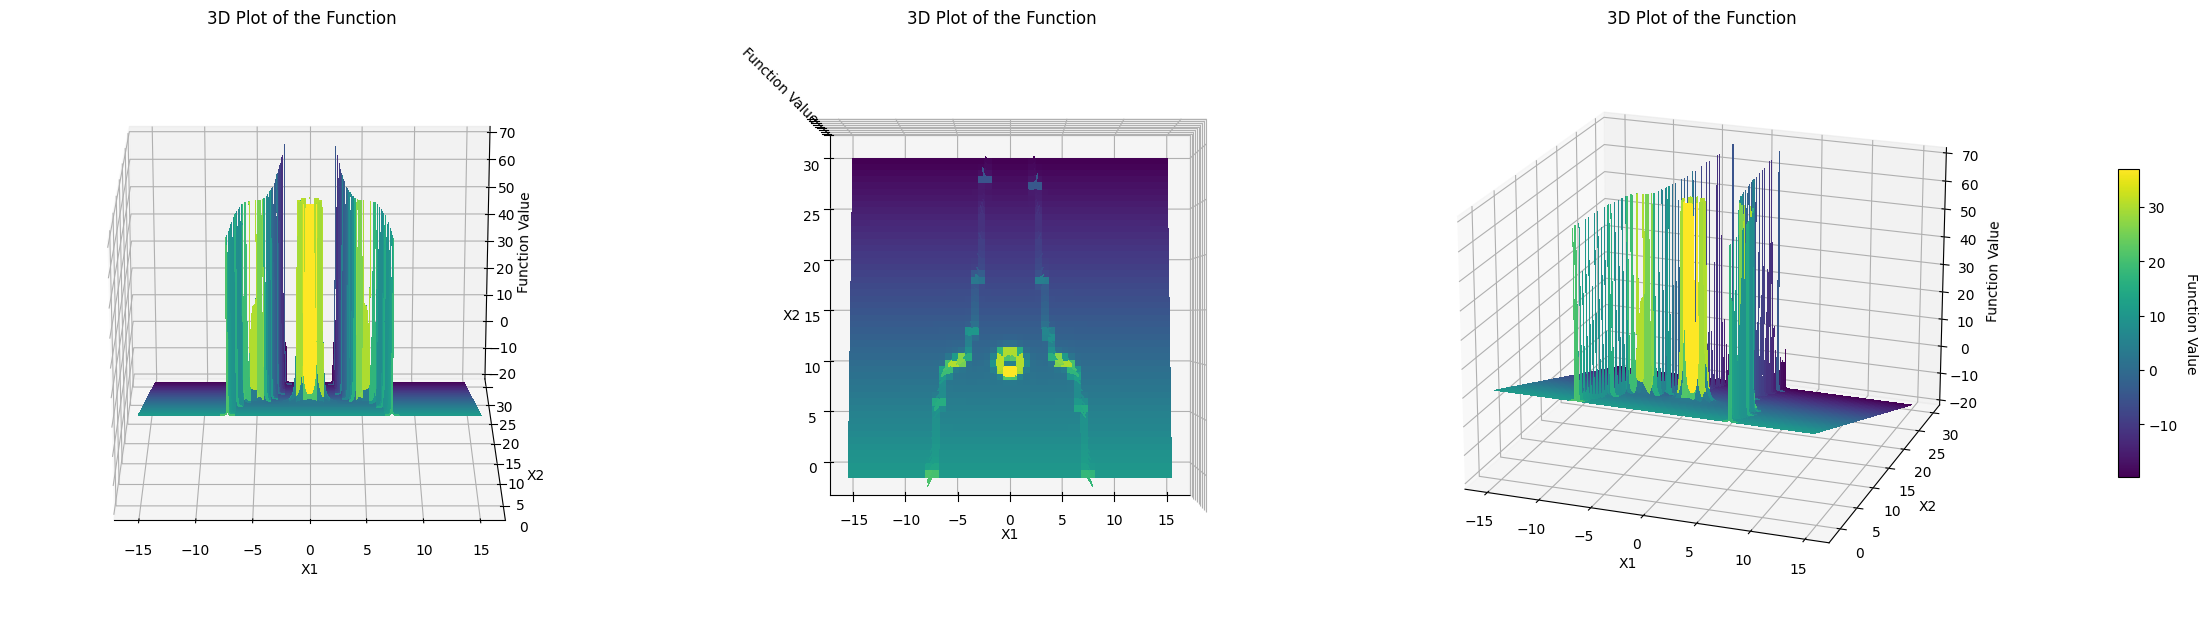

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import Normalize

# Create a 3D subplot
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(32, 8))

# Make data
x1 = np.linspace(-15, 15, 1000)
x2 = np.linspace(-1, 30, 1000)
x1, x2 = np.meshgrid(x1, x2)

center = (0, 10)
radius = 1
w1, w2 = 10, 5

# Define the function with clipping
#u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2)-radius)**-2 + np.abs(5 - x1)**-2 + np.abs(-5 - x1)**-2- x2
u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2)-radius)**-2 + (w1 - x2 + (x1+w2)**3)**-2 + (w1 - x2 + (-x1+w2)**3)**-2 - x2 + 10


# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Plot the surface

for i in range(3):
    surf = ax[i].plot_surface(x1, x2, u, cmap='viridis', linewidth=0, antialiased=False)
    ax[i].set_zlim(u_min, u_max)
    ax[i].zaxis.set_major_locator(LinearLocator(10))
    ax[i].set_xlabel('X1')
    ax[i].set_ylabel('X2')
    ax[i].set_zlabel('Function Value')
    ax[i].set_title('3D Plot of the Function')


# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)
cbar.set_label('Function Value', rotation=270, labelpad=15)

# Adjust the view angle for better visibility
ax[0].view_init(elev=20, azim=-90)
ax[1].view_init(elev=90, azim=-90)
ax[2].view_init(elev=20, azim=-70)

ax[1].zaxis.set_ticklabels([])

# Show the plot
plt.show()


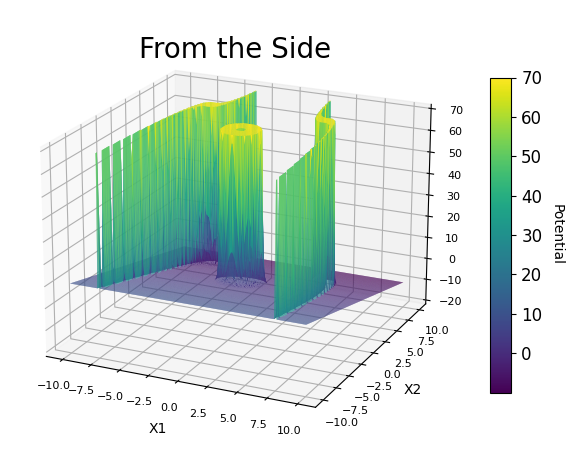

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

# Function definition (modify as needed)
def my_function(x1, x2, center, radius, wall, exp=-2):
    return (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2) - radius)**exp + (wall - x2 - (x1 - wall)**3)**exp + (-wall + x2 - (x1 + wall)**3)**exp - x2

# Parameters
center = [0, 0]
radius = 1
wall = 5

# Create a grid of points
x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-10, 10, 200)
x1, x2 = np.meshgrid(x1, x2)

# Evaluate the function
u = my_function(x1, x2, center, radius, wall, exp=-10)

# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Create a triangular mesh
triang = Triangulation(x1.flatten(), x2.flatten())

# Plot settings
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangular surface
surf = ax.plot_trisurf(triang, u.flatten(), cmap='viridis', linewidth=0, antialiased=True)

# Set axis labels and limits
ax.set_xlabel('X1')
ax.set_ylabel('X2')
#ax.set_zlabel('Function Value')
ax.set_title('From the Side', fontsize=20, y=.95)
ax.set_zlim(u_min, u_max)

#ax.zaxis.set_ticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)

ax.view_init(elev=20, azim=-65)

# Add a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=15)
cbar.set_label('Potential', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=12)


fig.tight_layout()

# Show the plot
plt.show()

C:\Users\wille\AppData\Local\Temp\ipykernel_20940\368831307.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
C:\Users\wille\AppData\Local\Temp\ipykernel_20940\368831307.py:57: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


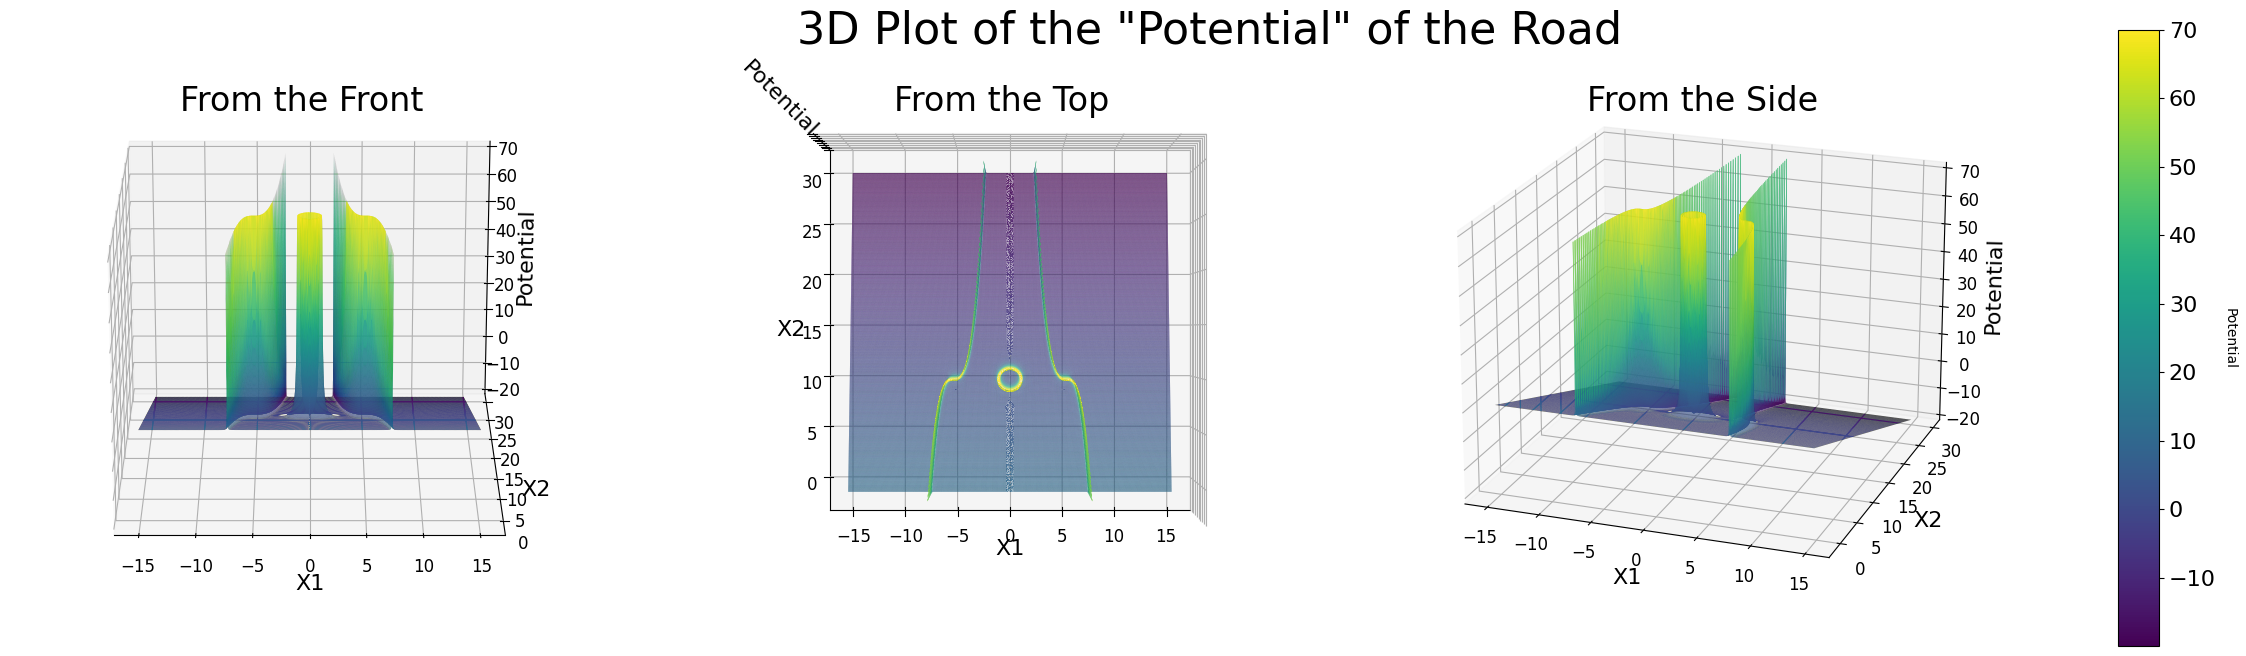

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from matplotlib.tri import Triangulation

# Create a 3D subplot
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(32, 16))

# Make data
x1 = np.linspace(-15, 15, 1000)
x2 = np.linspace(-1, 30, 1000)
x1, x2 = np.meshgrid(x1, x2)

center = (0, 10)
radius = 1
w1, w2 = 10, 5

# Define the function with clipping
u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2) - radius)**-2 + (w1 - x2 + (x1 + w2)**3)**-2 + (w1 - x2 + (-x1 + w2)**3)**-2 - x2 + 10

# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Plot the surface
for i in range(3):
    triang = Triangulation(x1.flatten(), x2.flatten())
    surf = ax[i].plot_trisurf(triang, u.flatten(), cmap='viridis', linewidth=0, antialiased=True)
    ax[i].set_zlim(u_min, u_max)
    ax[i].zaxis.set_major_locator(LinearLocator(10))
    ax[i].set_xlabel('X1', fontsize=16)
    ax[i].set_ylabel('X2', fontsize=16)
    ax[i].set_zlabel('Potential', fontsize=16)

    ax[i].tick_params(labelsize=12)

yy = 0.95
ax[0].set_title('From the Front', fontsize=24, y=yy)
ax[1].set_title('From the Top', fontsize=24, y=yy)
ax[2].set_title('From the Side', fontsize=24, y=yy)

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)
cbar.set_label('Potential', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=16)

# Adjust the view angle for better visibility
ax[0].view_init(elev=20, azim=-90)
ax[1].view_init(elev=90, azim=-90)
ax[2].view_init(elev=20, azim=-70)

ax[1].zaxis.set_ticklabels([])

fig.suptitle('3D Plot of the "Potential" of the Road', fontsize=32, y=0.70)

fig.tight_layout()

# Show the plot
plt.show()
